<a href="https://colab.research.google.com/github/ShuvamAich/Machine-Learning/blob/main/Percentage_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation**
##Data Science and Business Analytics Internship
Task 1: To predict the percentage of marks of a student based on the number of study hours

**Author: Shuvam Aich**

In [2]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing the dataset
!wget "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

--2021-01-06 17:17:02--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘student_scores - student_scores.csv.1’

student_scores - st 100%[===================>]     212  --.-KB/s    in 0s      

2021-01-06 17:17:02 (10.6 MB/s) - ‘student_scores - student_scores.csv.1’ saved [212/212]



In [5]:
#reading the dataset
df=pd.read_csv("student_scores - student_scores.csv")

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.shape

(25, 2)

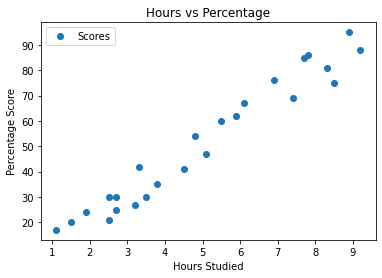

In [11]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score, making it ideal for the application of linear regression.

# Data Preparation

In [13]:
x1 = df.iloc[:, :-1].values  
y1 = df.iloc[:, 1].values  
x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

In [19]:
#Train and Test Set
from sklearn.model_selection import train_test_split  
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #Train and test data divided into 70:30 ratio

##**Training the Dataset**

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


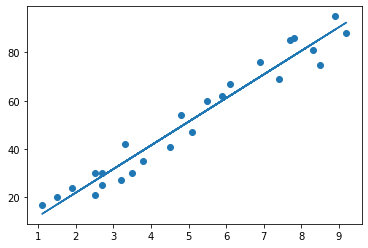

In [21]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making Predictions

In [28]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[[17.05366541]
 [33.69422878]
 [74.80620886]
 [26.8422321 ]
 [60.12335883]
 [39.56736879]
 [20.96909209]
 [78.72163554]]


# Model Evaluation

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651


# **Prediction**

In [31]:
hours = np.array(9.25)
hours=hours.reshape(-1,1)
pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = [92.91505723]
